# Comparación entre diferentes transformaciones del histograma

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

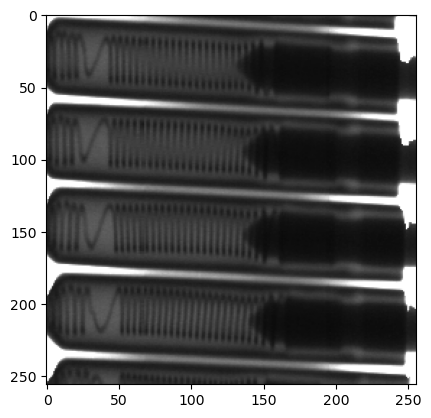

In [3]:
bougiesImg = cv2.imread("img_lab2/BOUGIES.png", 0)
plt.imshow(bougiesImg, cmap='gray', vmin=0, vmax=255)

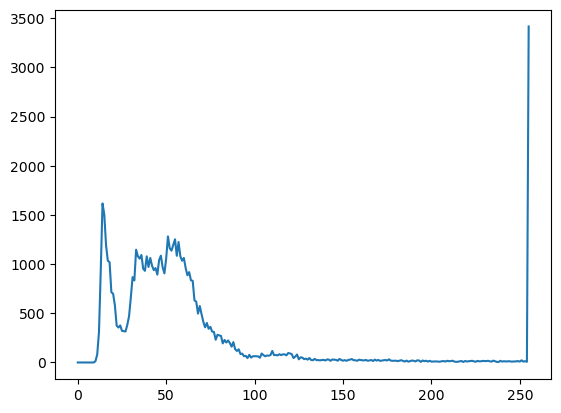

In [4]:
hist = cv2.calcHist([bougiesImg], [0], None, [256], [0, 256])
plt.plot(hist)

**Expansión contraste**

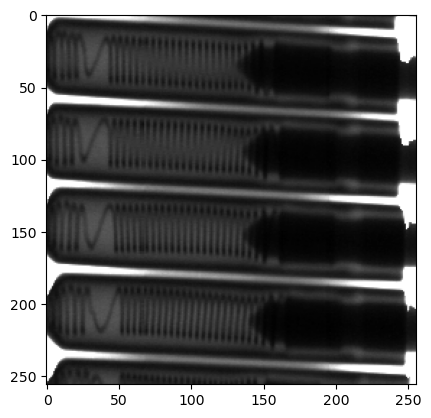

In [5]:
expandedImg = exposure.rescale_intensity(bougiesImg, in_range=(np.min(bougiesImg), np.max(bougiesImg)), out_range=(0, 255)).astype(np.uint8)
plt.imshow(expandedImg, cmap='gray', vmin=0, vmax=255)

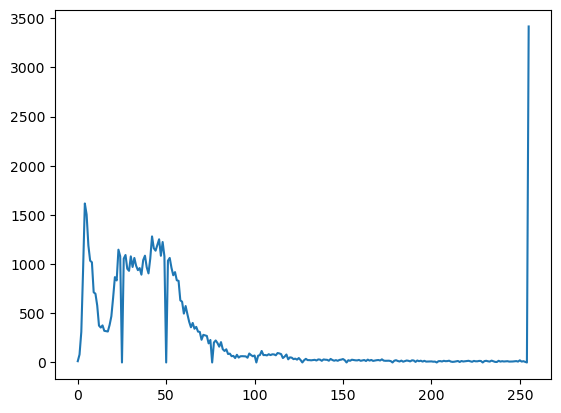

In [6]:
histExpanded = cv2.calcHist([expandedImg], [0], None, [256], [0, 256])
plt.plot(histExpanded)

El resultado es muy parecido y se debe a que el histograma tenía su máximo en 255 y su mínimo era muy oscuro, entonces no se pudo expandir mucho.

**Ecualización**

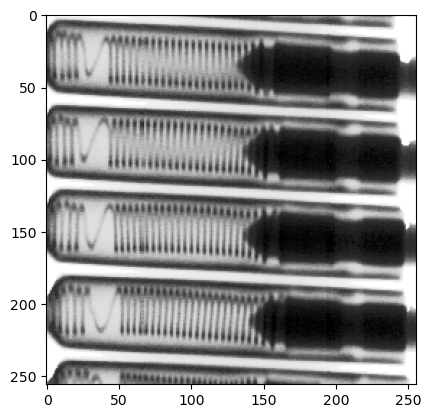

In [7]:
equalized = cv2.equalizeHist(bougiesImg)
plt.imshow(equalized, cmap='gray', vmin=0, vmax=255)

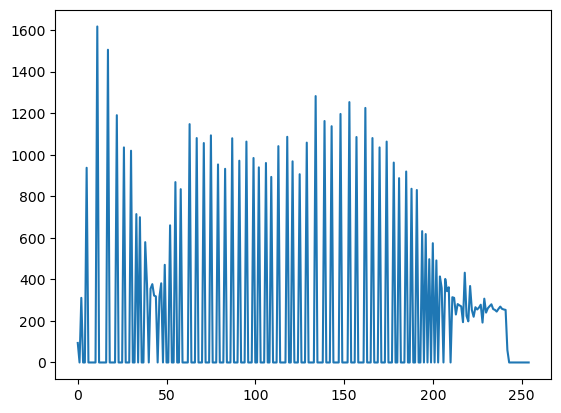

In [8]:
histEqualized = cv2.calcHist([equalized], [0], None, [255], [0, 255])
plt.plot(histEqualized)

Lo que podemos ver es que en comparación con la imágen de expansión de contraste en esta imágen podemos ver con mucha más claridad el cambio, esto se debe a que la ecualización distribuyó los valores de los colores que se encontraban acumulados en las esquinas del histograma.

**Transformación Logarítmica**

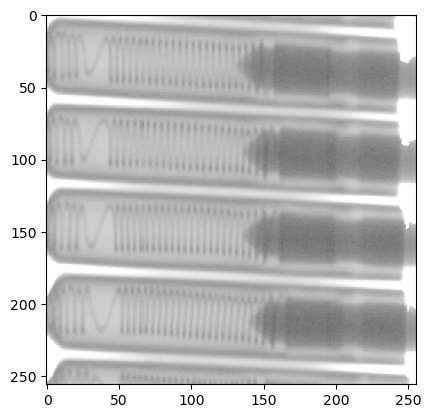

In [9]:
# Convertir a float64 primero
img_f = bougiesImg.astype(float)
log_img = (np.log(1 + img_f) * 46).astype(np.uint8)

plt.imshow(log_img, cmap='gray', vmin=0, vmax=255)

Es necesario multiplicar por 46 debido a que al aplicar una transformación logarítmica los valores quedan muy pequeños (el máximo se convierte en 5.5). Debido a esto para reescalar nuevamente nuestros valores multiplicamos por 46 y así logramos que los colores vuevan a estar en un rango que nos permita ver la imágen.

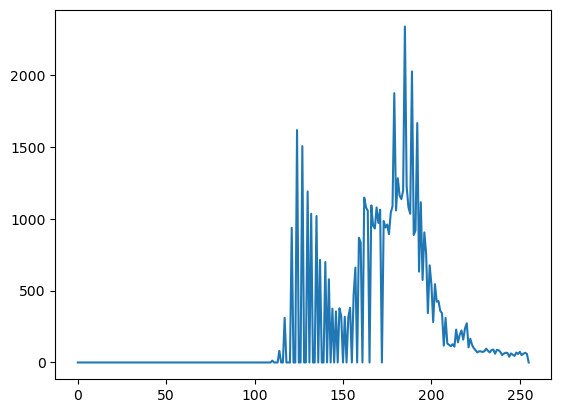

In [10]:
log_hist = cv2.calcHist([log_img], [0], None, [256], [0, 255])
plt.plot(log_hist)

El histograma presenta valores mucho más claros (por el escalamiento) pero también un histograma con un rango mucho mayor y con más colores que el original.

**Especificacion del histograma**

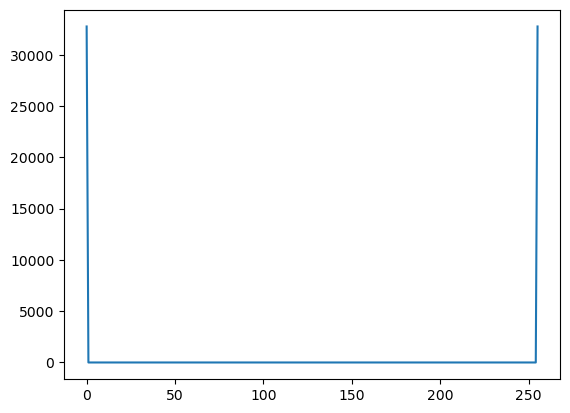

In [13]:
# Cargamos las imagenes que utilizaremos para la especificación.
ref_alto = np.zeros(bougiesImg.shape, dtype=np.uint8)
ref_alto[:, bougiesImg.shape[1]//2:] = 255 

hist_refalto = cv2.calcHist([ref_alto], [0], None, [256], [0, 256])
plt.plot(hist_refalto)

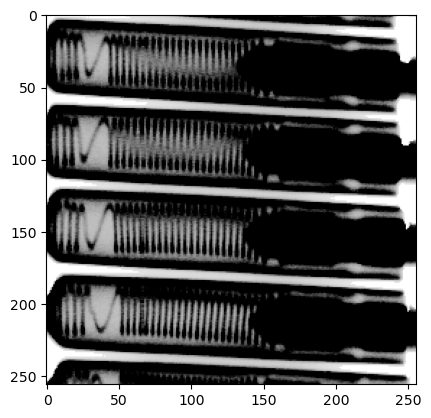

In [16]:
resultado1 = exposure.match_histograms(bougiesImg, ref_alto).astype(np.uint8)

plt.imshow(resultado1, cmap='gray', vmin=0, vmax=255)

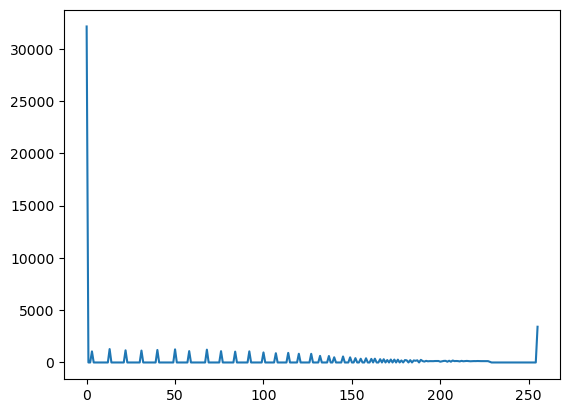

In [17]:
hist_r1 = cv2.calcHist([resultado1], [0], None, [256], [0, 256])
plt.plot(hist_r1)

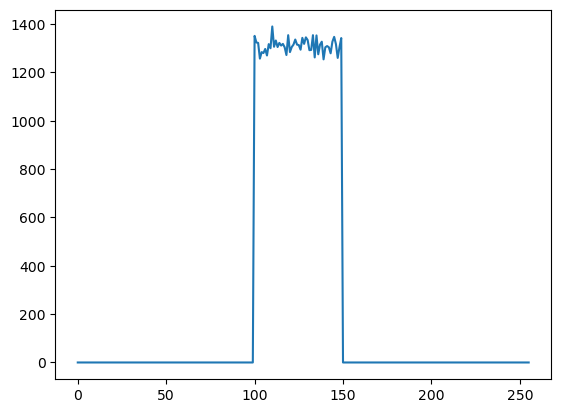

In [18]:
# Creamos una imagen que solo tiene tonos grises medios
ref_bajo = np.random.randint(100, 150, size=bougiesImg.shape, dtype=np.uint8)

hist_refbajo = cv2.calcHist([ref_bajo], [0], None, [256], [0, 256])
plt.plot(hist_refbajo)

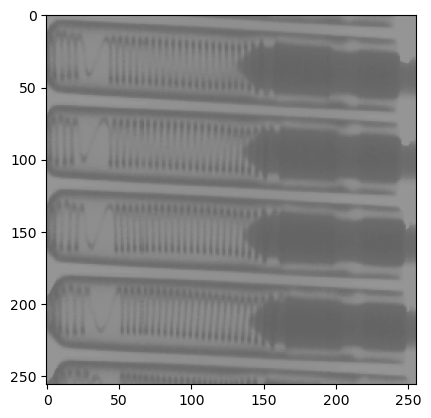

In [19]:
resultado2 = exposure.match_histograms(bougiesImg, ref_bajo).astype(np.uint8)

plt.imshow(resultado2, cmap='gray', vmin=0, vmax=255)

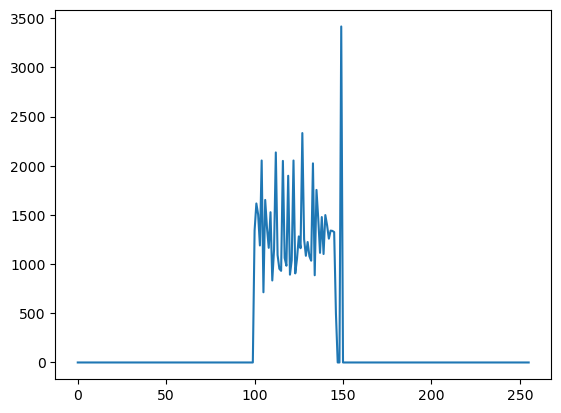

In [20]:
hist_r2 = cv2.calcHist([resultado2], [0], None, [256], [0, 256])
plt.plot(hist_r2)

Lo que podemos ver es que la transformación de expansión de contraste no fue muy util puesto que la imagen no permitía mucha expansión dado que su minimo y máximo ya estaban en los extremos, por ende la imagen no cambió mucho. 

Luego con la ecualización el resultado fue mucho mejor con un contraste mucho más alto entre los colores de la imagen, esto ocurre debido a que originalmente la imágen tenía una alta concentración de blancos y negros, que fueron distribuidos. 

En la transformación logarítmica se logró también un buen resultado, mucho más claro, y con cambios de color más suaves a comparación de la ecualización, debido a que el histograma no presenta huecos al ser una función continua. 

Finalmente con Las especificaciónes conseguimos también buenos resultados pero dependieron de la distribución a la que queríamos parecernos, en el primer caso como teníamos una distribución más extrema conseguimos un contraste más alto.